# Машинное обучение, ФКН ВШЭ

# Практическое задание 1

## Общая информация

Дата выдачи: 16.09.2016

Срок сдачи: 30.09.2016 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на hse.cs.ml+<номер группы>@gmail.com (например, hse.cs.ml+141@gmail.com для студентов группы БПМИ-141).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [297]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [6]:
def max_element(arr):
    az = np.where(x == 0)[0] + 1
    res = x[az[az < len(x)]]
    if len(res):
        return max(res)
    else:
        return None

x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(max_element(x))
x = np.array([])
print(max_element(x))
x = np.array([1,2,3])
print(max_element(x))
x = np.array([0,0,0])
print(max_element(x))

5
None
None
0


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [10]:
def nearest_value(X, v):
    return np.abs(X - v).argmin()

X = np.arange(0,10).reshape((2, 5))
v = 3.6
print(nearest_value(X, v))
v = 0
print(nearest_value(X, v))
v = -100
print(nearest_value(X, v))
v = 1000
print(nearest_value(X, v))
v = 5.5
print(nearest_value(X, v))

4
0
0
9
5


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [7]:
def scale(X):
    (mean, var) = (np.mean(X, axis=0), np.std(X, axis=0))
    if 0 not in var:
        return (X - mean)/var
    
X = (np.random.rand(10,10) * 100).astype(int)
from sklearn import preprocessing
print(preprocessing.scale(X, axis=0, with_mean=True, with_std=True, copy=True) == scale(X))

[[ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]]


/Users/nastyats/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [10]:
def get_stats(X):
    return (np.linalg.det(X), np.trace(X), np.amax(X), np.amin(X), np.linalg.norm(X, ord=None), np.linalg.eig(X)[0], np.linalg.inv(X))

X = np.random.normal(10, 1, 100).reshape(10,-1)
print(get_stats(X))

(1653.7984652607661, 98.482990970781344, 12.773374704981302, 7.0454305200720855, 99.803095848236495, array([  9.91951224e+01+0.j        ,   2.99575316e+00+0.j        ,
         2.67689666e-01+2.37009408j,   2.67689666e-01-2.37009408j,
        -2.78592183e+00+0.j        ,  -1.93613330e+00+0.95937073j,
        -1.93613330e+00-0.95937073j,   1.87525162e+00+0.j        ,
         6.05867069e-01+0.j        ,  -6.61941974e-02+0.j        ]), array([[  1.47926756e+00,  -1.23428391e+00,   1.34122125e+00,
          3.41131878e+00,  -3.09862776e+00,   5.16875461e+00,
         -3.01865214e+00,   4.10491802e+00,   2.17133167e-01,
         -8.78841690e+00],
       [ -4.37479987e-01,   2.49635859e-01,  -1.04640489e-01,
         -4.06813701e-01,   3.88035788e-01,  -5.80446791e-01,
          2.22991105e-01,  -5.06869663e-01,   6.62073783e-03,
          1.23370507e+00],
       [ -8.53047052e-01,   6.31668911e-01,  -5.60936186e-01,
         -1.95757880e+00,   2.32075240e+00,  -3.18350740e+00,
          1.

**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [22]:
max = []
for exp_num in range(100):
    A = np.random.normal(0, 1, 100).reshape(10,-1)
    B = np.random.normal(0, 1, 100).reshape(10,-1)
    max += [np.amax(A.dot(B))]
    
print(np.mean(max))

print(np.percentile(max, 0.95))

8.40641605768
5.33098134448


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

In [5]:
import pandas as pd
%matplotlib inline

df = pd.read_csv("/Users/nastyats/Downloads/2008.csv")

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [10]:
df['CancellationCode'].mode()[0]

'A'

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [29]:
print(df['Distance'].mean(), df['Distance'].max(), df['Distance'].min())

724.5082571428571 4962 31


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [36]:
print(df.loc[df['Distance'] == df['Distance'].min()][['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightNum', 'Distance']])
fl_numbs = df.loc[df['Distance'] == df['Distance'].min()]['FlightNum']
print(df.loc[df['FlightNum'].isin(fl_numbs)][['Distance', 'FlightNum']])

       Year  Month  DayofMonth  DayOfWeek  FlightNum  Distance
1116   2008     12          30          2         65        31
6958   2008     12          26          5         65        31
17349  2008      8          18          1         64        31
27534  2008      3          11          2         64        31
46082  2008      8           9          6         65        31
48112  2008      2          28          4         64        31
       Distance  FlightNum
501         533         64
1116         31         65
1389        680         64
1517        680         65
2619       2381         64
3869         82         64
4025       1005         64
4466        123         64
6326         82         65
6778        359         64
6958         31         65
7891       2381         64
7977       1747         64
8448        123         64
9615        533         64
10113       571         65
10833       372         64
12352      1747         64
12980        82         64
13155      1747    

**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [37]:
df['Origin'].value_counts().idxmax()

'ATL'

**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [41]:
mean_time = df.groupby('Origin')['AirTime'].mean()
print(mean_time)
print(mean_time.argmax())

Origin
ABE     88.266667
ABI     36.400000
ABQ     93.454321
ABY     35.714286
ACK     50.800000
ACT     28.521739
ACV     55.606061
ACY    113.500000
ADK    142.000000
ADQ     42.666667
AEX     69.314286
AGS     35.000000
AKN     48.000000
ALB    102.347826
ALO     34.666667
AMA     56.474359
ANC    165.415094
ASE     46.234043
ATL     93.010084
ATW     56.571429
AUS    102.662921
AVL     75.487805
AVP     96.413793
AZO     34.703704
BDL    115.602837
BET     56.583333
BFL     57.040816
BGM     67.888889
BGR     84.176471
BHM     79.177215
          ...    
SNA    107.233333
SPI     56.454545
SPS     30.000000
SRQ    105.213333
STL     99.070400
STT    185.029412
STX    153.000000
SUN     47.230769
SUX     45.750000
SWF    139.636364
SYR     89.701389
TEX     97.500000
TLH     57.121212
TOL     50.733333
TPA    116.484472
TRI     49.200000
TUL     82.910256
TUS     90.564854
TVC     50.636364
TWF     39.708333
TXK     45.333333
TYR     30.000000
TYS     70.660131
VLD     48.181818
VPS

**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [142]:
grouped = df[df['DepDelay'] > 0].groupby('Origin')['DepDelay'].agg(['count', 'sum'])
grouped = grouped[grouped['count'] > 1000]

print(grouped['sum'].argmax())

ORD


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [436]:
df = pd.read_csv("/Users/nastyats/Downloads/2008.csv")

Y = df['DepDelay']
X = df.drop('DepDelay', 1)
print('есть ли пропуски', X.isnull().any().any()) #1. есть пропуски
print('количество пропусков', X.isnull().sum().sum()) #2. количество пропусков
print('количество объектов имеют хотя бы один пропуск', X.isnull().any(axis=1).sum()) #3. количество объектов имеют хотя бы один пропуск
print('количество признаков которые имеют хотя бы одно пропущенное значение', X.isnull().any(axis=0).sum()) #4. количество признаков имеют хотя бы одно пропущенное значение
print('количество пропусков целевой переменой', Y.isnull().sum())

есть ли пропуски True
количество пропусков 353816
количество объектов имеют хотя бы один пропуск 70000
количество признаков имеют хотя бы одно пропущенное значение 15
количество пропусков целевой переменой 1399


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [447]:
df = pd.read_csv("/Users/nastyats/Downloads/2008.csv")

df.dropna(subset = ['DepDelay'], inplace=True) # удаляем строки с пропущенными значения в целевой переменной
df = df[df['DepDelay'] != 0] # удаляем строки с нулевыми значениями в целевой переменной

Y = df['DepDelay']
X = df.drop('DepDelay', 1)

print('количество пропусков у признаков:\n', X.isnull().sum(axis=0))  
print('общее количество объектов', str(len(df)))

# судя по таблице CRSDepTime не заполненно когда abs(DepTime - CRSDepTime) мало
# CancellationCode --> 63392 / 64803 = 0.9782263166828696  -- выкидываем
# CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay --> 49937 / 64803 = 0.77 -- выкидываем
# TailNum -- выкидываем потому что это никак не связанно с DepDelay
# Year -- одинаковый везде
# исключаем признаки 
Y = df['DepDelay']
X = df.drop(['Year', 'DepDelay', 'CancellationCode', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'TailNum'], 1)


количество пропусков у признаков:
 Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                140
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                  0
ActualElapsedTime      164
CRSElapsedTime           5
AirTime                164
ArrDelay               164
Origin                   0
Dest                     0
Distance                 0
TaxiIn                 140
TaxiOut                  7
Cancelled                0
CancellationCode     63392
Diverted                 0
CarrierDelay         48538
WeatherDelay         48538
NASDelay             48538
SecurityDelay        48538
LateAircraftDelay    48538
dtype: int64
общее количество объектов63404


**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [448]:
features_name = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']
for feature_name in features_name:
    X[feature_name + '_Hour'] = X[feature_name] - X[feature_name] % 100
    X[feature_name + '_Minute'] = X[feature_name] % 100
X = X.drop(features_name, 1)

X.head(10).style 
print(X)
    

       Month  DayofMonth  DayOfWeek UniqueCarrier  FlightNum  \
0          6          18          3            WN        242   
1          6           4          3            XE       2380   
2          8           3          7            WN       1769   
3          1          23          3            OO       3802   
4          5           4          7            WN        399   
5          1           3          4            B6        834   
6          3          31          1            WN       1589   
7          4          22          2            DL        617   
8          3           4          2            WN        454   
9         10           6          1            UA        270   
10        11          16          7            WN       3596   
12        12          23          2            FL         52   
13         7          15          2            EV       4186   
14         1          29          2            WN       3589   
15        11          13          4     

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [449]:
# CRSDepTime и CRSArrTime - на прямую показвают время задержки 
X = X.drop(['CRSDepTime_Minute', 'CRSDepTime_Hour', 'CRSArrTime_Hour', 'CRSArrTime_Minute'], 1)

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

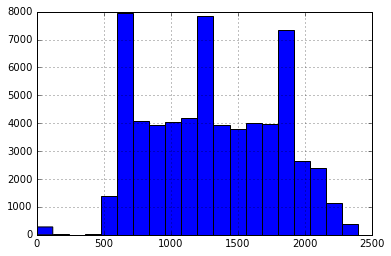

In [450]:
X['DepTime_Hour'].hist(bins=20)

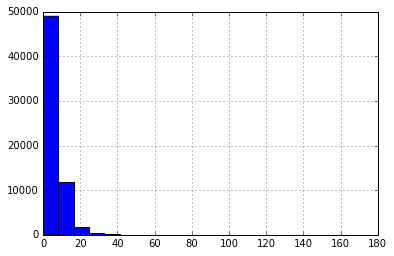

In [451]:
X['TaxiIn'].hist(bins=20)

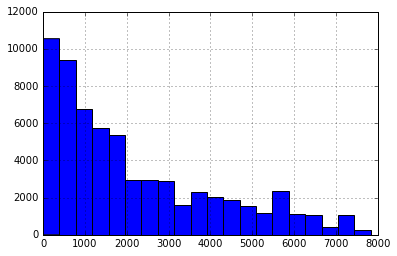

In [452]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [453]:
from sklearn import preprocessing
# большая часть кода из семинаров
def transform_data(data):
	cat_features_mask = (data.dtypes == "object").values
	label_enc = preprocessing.LabelEncoder()
	for feature in data.columns[cat_features_mask]:
		data[feature] = label_enc.fit_transform(data[feature])

	enc = preprocessing.OneHotEncoder(sparse=False)
	data_str = enc.fit_transform(data[data.columns[cat_features_mask]])
	data_str = pd.DataFrame(data=data_str)

	data_str.drop(enc.feature_indices_[:-1], axis=1, inplace=True)


	data_real = data[data.columns[~cat_features_mask]]

	data_str.fillna('nan', inplace=True)
	data_real = data_real.fillna(0)
	normalizer = preprocessing.StandardScaler().fit_transform(data_real)
	data_real = pd.DataFrame(data=normalizer)


	data = pd.concat([data_real, data_str], axis=1)
	data.columns = np.array(["f"+str(i) for i in range(1, data.shape[1] + 1)])
	return data

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [454]:
X = transform_data(X)
X
# количетво принаков увеличилосьдо 630

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f619,f620,f621,f622,f623,f624,f625,f626,f627,f628
0,-0.118281,0.256485,-0.462767,-0.991600,-0.988979,-0.916826,-0.849307,-0.021975,-0.744130,-0.786908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.118281,-1.332050,-0.462767,0.106546,-0.040552,0.127377,0.064301,-0.175419,0.183961,-0.582387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.467662,-1.445517,1.541454,-0.207284,0.157627,0.370547,0.314806,-0.712473,0.471018,-0.582387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.583137,0.823819,-0.462767,0.836931,-0.351976,-0.258835,-0.363032,-0.533455,-0.347886,-0.582387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.411252,-1.332050,1.541454,-0.910960,0.299183,0.442068,0.476898,-0.661325,0.634799,-0.582387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-1.583137,-1.445517,0.038288,-0.687530,0.624762,0.499285,0.727403,0.566228,0.525612,-0.377866,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-0.997195,1.731554,-1.464878,-0.299738,-0.748333,-0.773785,-0.716686,-0.277715,-0.707147,-0.377866,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-0.704223,0.710352,-0.963823,-0.798988,3.045375,3.460244,2.923008,-1.096083,2.674134,0.440219,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-0.997195,-1.332050,-0.963823,-0.882710,0.667229,0.728151,0.889495,-0.482307,0.603099,-0.582387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.053604,-1.105117,-1.464878,-0.977219,1.021120,1.157276,1.081058,-0.559029,1.457225,-0.173345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [455]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
y_train

47629      5.0
39632     15.0
46373     99.0
42942     16.0
44966     79.0
59783     -5.0
40866     -3.0
55446     -5.0
23565    101.0
9927      -8.0
36229     -4.0
29811     -5.0
36884     26.0
28637     -4.0
55489     -7.0
16353     -2.0
46821      4.0
44829     -3.0
24165     -5.0
49603      8.0
14239     -6.0
41968     -7.0
3837      20.0
43431     -1.0
29585    -10.0
31169      7.0
66184      2.0
6703      -6.0
30039     -4.0
3484      -5.0
         ...  
19473      5.0
43310     -5.0
41804     -2.0
5915       6.0
2713       1.0
61952     70.0
69493     -2.0
65951     -6.0
868      -25.0
1890      -1.0
45420     -3.0
17762     -3.0
66518     -9.0
48759     -4.0
67093     49.0
52124    149.0
24303     55.0
41110     35.0
69192     -5.0
18675     -3.0
6981      -4.0
60610     -1.0
12522     -2.0
49426    -10.0
60025     57.0
69067      1.0
42174     10.0
963       -3.0
17511      1.0
62292     -5.0
Name: DepDelay, dtype: float64

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [459]:
from sklearn.linear_model import LinearRegression as LR
from sklearn import cross_validation
from sklearn.metrics import r2_score, mean_squared_error
lr = LR()
X_tr = X_train[:1000]
y_tr = y_train[:1000]
X_ts = X_test[:1000]
y_ts = y_test[:1000]

lr.fit(X_tr, y_tr)

y_pred = lr.predict(X_ts)
y_pr = lr.predict(X_tr)

print(r2_score(y_ts, y_pred), r2_score(y_tr, y_pr))
print(mean_squared_error(y_ts, y_pred, ), mean_squared_error(y_tr, y_pr))
print('coeff', lr.coef_)
# слишком сильно подстроилась под тестовую выборку

0.890151018195 1.0
119.039927366 2.95421991622e-25
coeff [ -1.02327667e-14   3.73034936e-14   2.14939178e-13  -3.99680289e-14
  -1.94975474e+02   6.99097706e+01   1.19438596e+02   3.91021852e+01
  -1.22568622e-13   8.60546594e+00   2.00321596e+01  -3.61513683e+00
  -1.01895878e+01   2.70006240e-13  -2.84217094e-14   2.84217094e-14
   2.66453526e-15  -1.77635684e-15   1.39054720e+00  -2.02060590e-13
  -3.90798505e-14  -1.42996726e-13  -3.58824082e-13  -4.36983782e-13
  -2.45137244e-13  -4.26325641e-14  -2.13162821e-14  -2.42472709e-13
  -2.17603713e-13  -3.99680289e-13  -3.23296945e-13  -1.67865721e-13
  -1.83852933e-13  -1.38555833e-13  -1.90070182e-13  -3.76587650e-13
  -3.13035867e-02  -3.13035867e-02  -3.13035867e-02  -4.02836040e-02
  -1.76607560e-02  -3.13035867e-02  -3.79344020e-02  -1.14810610e-01
  -4.46977289e-02  -3.46991419e-02   1.58619029e-02  -1.70877048e-01
  -3.13035867e-02   7.78315895e-02  -1.88859291e-02  -3.13035867e-02
  -3.13035867e-02  -3.13035867e-02  -3.1303586

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (0.5 балла)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [ ]:
# Your code here

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19. (0 баллов)** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [ ]:
# Your code here

**20. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [ ]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    pass

In [ ]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    pass

In [ ]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    pass

In [ ]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    pass

In [ ]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    pass

**21. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [ ]:
def grad_descent(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [ ]:
# Your code here

**22. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**23. (1 доп. балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [ ]:
def sgd(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [ ]:
# Your code here

**24. (0.5 доп. балла)** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

**25. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [ ]:
# Your code here

Здесь вы можете поделиться своими мыслями по поводу этого задания.

А здесь — вставить вашу любимую картинку.